# FASHION CLASS CLASSIFICATION

## IMPORTING THE LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("fashion-mnist_train.csv", sep=',')

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test = pd.read_csv("fashion-mnist_test.csv", sep=',')

In [6]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
df_train.shape

(60000, 785)

In [9]:
df_test.shape

(10000, 785)

## VISUALIZATION OF THE DATASET

In [10]:
training = np.array(df_train, dtype='float32')
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
testing = np.array(df_test, dtype='float32')

In [12]:
import random
rand = random.randint(1,60000)

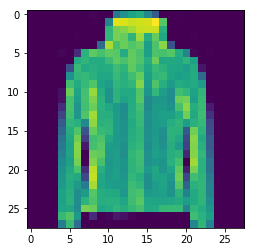

In [13]:
plt.imshow(training[rand,1:].reshape(28,28))

In [14]:
label = training[rand,0]
label

4.0

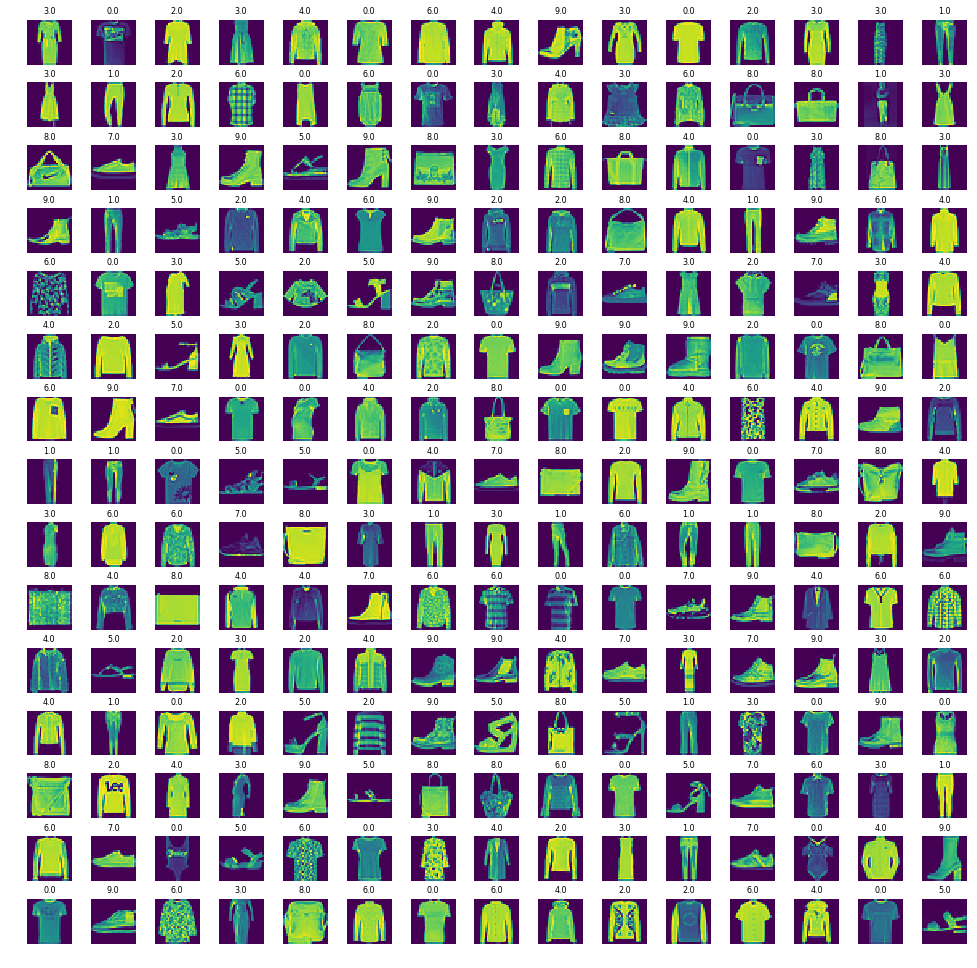

In [15]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
R_grid = 15
C_grid = 15

# fig, axes = plt.subplots(R_grid, C_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(R_grid, C_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, R_grid * C_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

## TRAINING THE MODEL

In [17]:
x_train = training[:,1:]/255
y_train = training[:,0]

In [19]:
x_test = testing[:,1:]/255
y_test = testing[:,0]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train,y_train,test_size = 0.2, random_state = 12345)

In [22]:
# * unpack the tuple
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))

In [23]:
x_train.shape

(48000, 28, 28, 1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

In [25]:
x_validate.shape

(12000, 28, 28, 1)

In [26]:
import keras

Using TensorFlow backend.


In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [28]:
model =Sequential()

In [29]:
model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))

/home/kuldeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [30]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
model.add(Flatten())

In [32]:
model.add(Dense(output_dim = 32, activation='relu'))

/home/kuldeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [35]:
model.add(Dense(output_dim = 10, activation='sigmoid'))

/home/kuldeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [36]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [37]:
epochs = 50

In [39]:
model.fit(x_train,y_train,batch_size=512, nb_epoch = epochs, verbose = 1, 
          validation_data=(x_validate, y_validate))

/home/kuldeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 48s 1ms/step - loss: 1.6885 - acc: 0.3298 - val_loss: 1.4037 - val_acc: 0.3752
Epoch 2/50
48000/48000 [==============================] - 45s 936us/step - loss: 1.1202 - acc: 0.4139 - val_loss: 0.9065 - val_acc: 0.5234
Epoch 3/50
48000/48000 [==============================] - 45s 936us/step - loss: 0.7251 - acc: 0.6378 - val_loss: 0.5916 - val_acc: 0.7322
Epoch 4/50
48000/48000 [==============================] - 45s 936us/step - loss: 0.5300 - acc: 0.8213 - val_loss: 0.4737 - val_acc: 0.8613
Epoch 5/50
48000/48000 [==============================] - 45s 934us/step - loss: 0.4090 - acc: 0.8666 - val_loss: 0.3873 - val_acc: 0.8708
Epoch 6/50
48000/48000 [==============================] - 45s 933us/step - loss: 0.3675 - acc: 0.8755 - val_loss: 0.3654 - val_acc: 0.8773
Epoch 7/50
48000/48000 [==============================] - 47s 986us/step - loss: 0.3495 - acc: 0.8803 - val_loss: 0.35

## EVALUATING THE MODEL

In [40]:
evaluate = model.evaluate(x_test,y_test)
print('Test Accuracy: {:.3f}'.format(evaluate[1]))

10000/10000 [==============================] - 3s 277us/step
Test Accuracy: 0.912


In [41]:
# get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

In [42]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

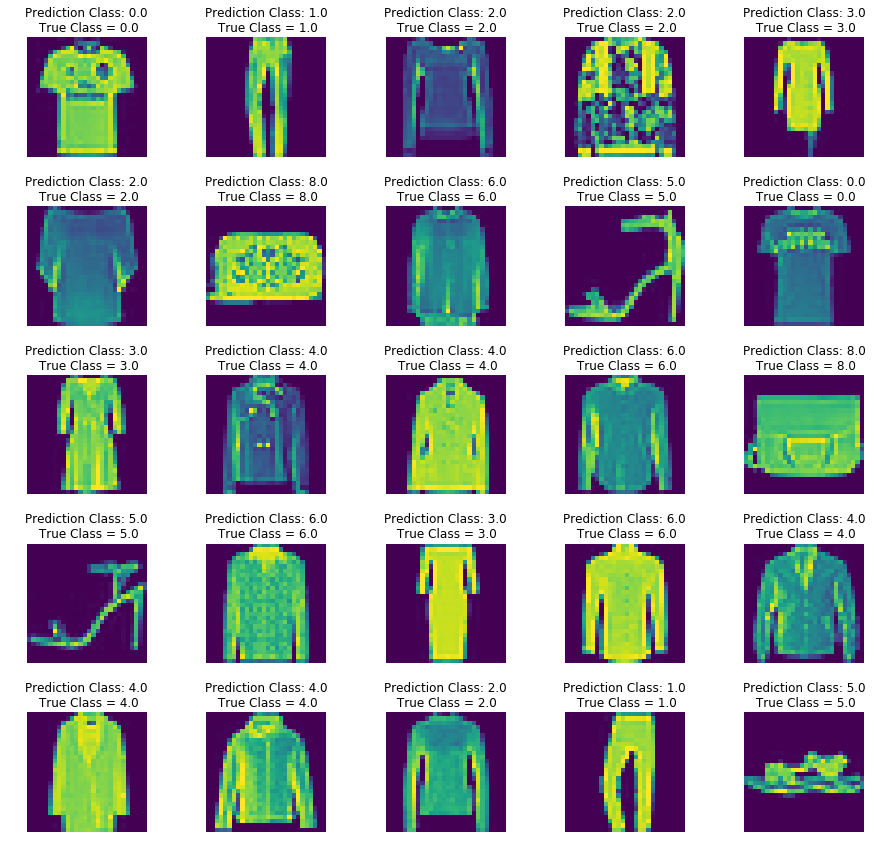

In [44]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
R_grid = 5
C_grid = 5

# fig, axes = plt.subplots(R_grid, C_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(R_grid, C_grid, figsize = (15,15))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

for i in np.arange(0, R_grid * C_grid): # create evenly spaces variables 

    # read and display an image with the selected index    
    axes[i].imshow( x_test[i].reshape((28,28)) )
    axes[i].set_title("Prediction Class: {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

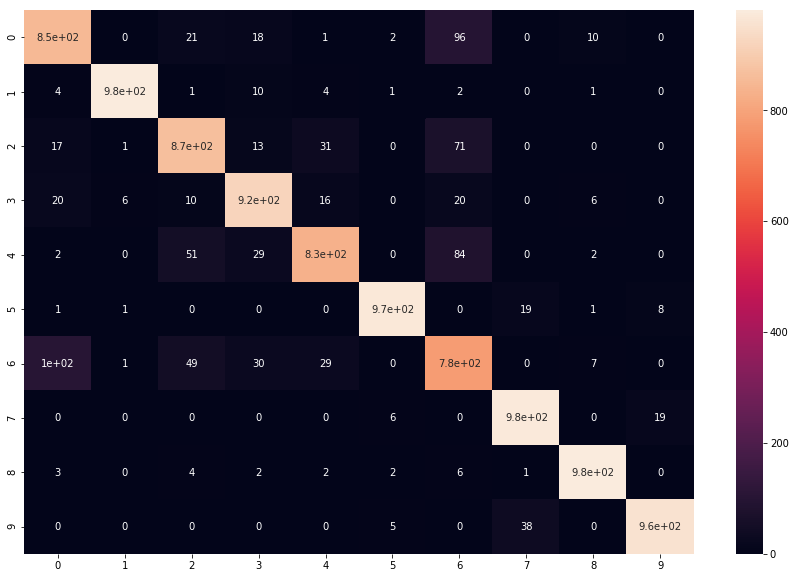

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)

In [47]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

             precision    recall  f1-score   support

    Class 0       0.85      0.85      0.85      1000
    Class 1       0.99      0.98      0.98      1000
    Class 2       0.86      0.87      0.87      1000
    Class 3       0.90      0.92      0.91      1000
    Class 4       0.91      0.83      0.87      1000
    Class 5       0.98      0.97      0.98      1000
    Class 6       0.74      0.78      0.76      1000
    Class 7       0.94      0.97      0.96      1000
    Class 8       0.97      0.98      0.98      1000
    Class 9       0.97      0.96      0.96      1000

avg / total       0.91      0.91      0.91     10000

